# Twitter Sentiment Analysis and Classification  
# Author: Adeyeye Blessing Temidayo 
# CIN: PIT/DEC25/10676 
# Data Source: 
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

# Project Overview: 
This project performs sentiment classification on social media data. It transitions from raw, unstructured text to a predictive model using Natural Language Processing (NLP) techniques like TF-IDF vectorization and Logistic Regression.



# 1. Introduction
This notebook presents an end-to-end Twitter Sentiment Analysis project. The objective is to analyze tweets, preprocess text data, extract meaningful features, and build machine learning models capable of classifying sentiment. The workflow follows standard data science best practices, from data understanding to model evaluation and interpretation.

# 2. Problem Statement  
Social media platforms like Twitter provide real-time insights into public opinion. 
- Understanding sentiment expressed in tweets can support policy analysis, public health communication,   and brand perception tracking.
- Analyze Twitter data and build a machine learning model capable of classifying tweets based on their sentiment (e.g., positive, negative, neutral,irrelevant). 

This analysis follows the standard Data Science Life Cycle and demonstrates practical skills in data preprocessing, feature engineering, model building, and evaluation.

# 3. Environment Setup & Libraries  

In [52]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score)
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Print stopwords in English
print(stopwords.words("english"))
stop_words = set(stopwords.words('english')) 

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# 4. Data Loading

In [4]:
column_names = ['Id', 'Entity', 'Sentiment', 'Tweet_content']
df = pd.read_csv("twitter_training.csv", encoding="ISO-8859-1", names=column_names, header=None)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (74682, 4)


,Id,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# 5. Data inspection

In [5]:
print(f"\n Data info")
df.info()


 Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
# Check for missing values
df.isnull().sum()

Id                 0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [7]:
# percentage of missing values in the dataset
for col in df.columns:
    percentage_of_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percentage_of_missing))
 

Id - 0.0%
Entity - 0.0%
Sentiment - 0.0%
Tweet_content - 0.009185613668621622%


# 6. Exploratory Data (EDA)

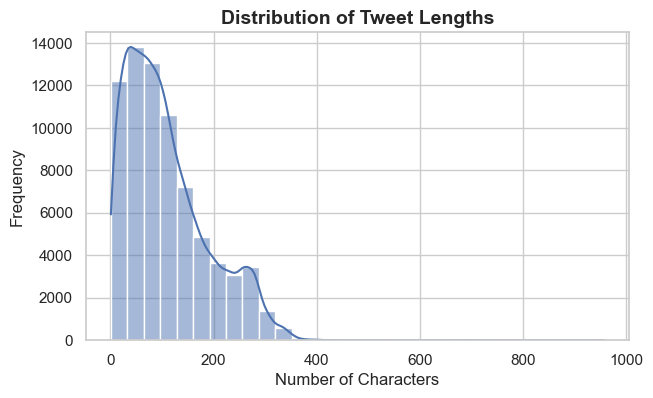

In [11]:
# Calculate the length of each tweet (number of characters)
df['tweet_length'] = df['Tweet_content'].str.len()

# Plot the distribution
plt.figure(figsize=(7,4))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.savefig('twitter_images/Distribution of Tweet Lengths.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Get the categories of the sentiments
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

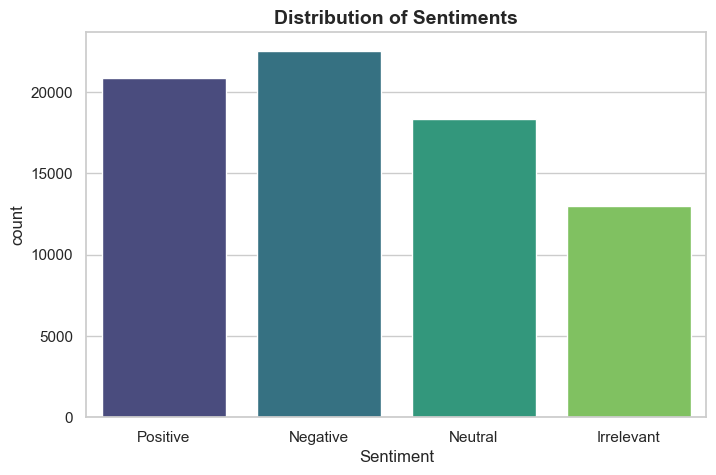

In [13]:
# Distribution of Sentiments 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Distribution of Sentiments',fontsize=14, fontweight='bold')
plt.savefig('twitter_images/Distribution of Sentiments.png', dpi=300, bbox_inches='tight')
plt.show()

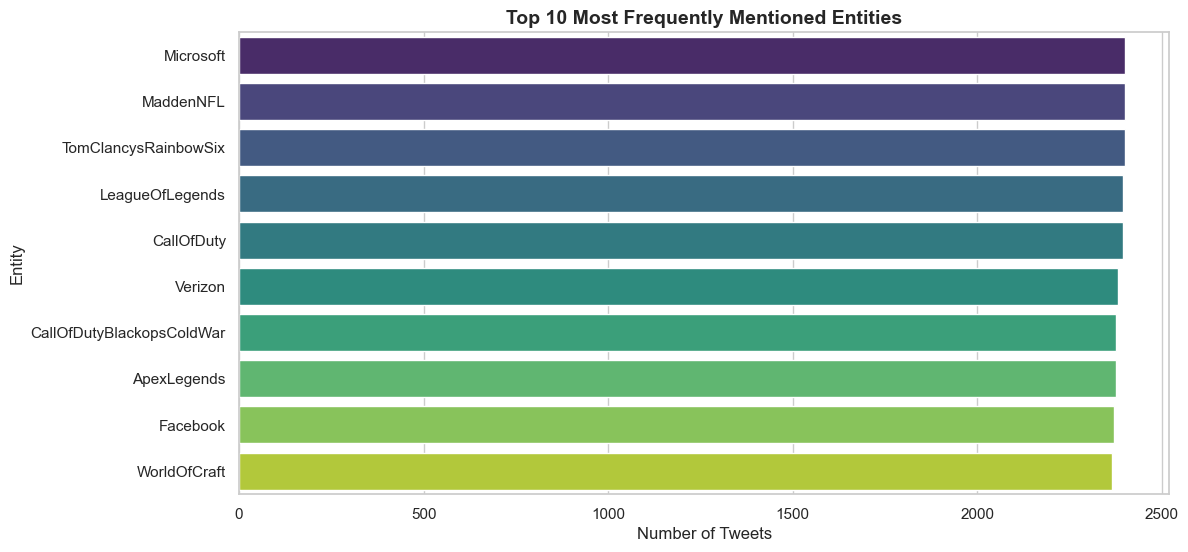

In [14]:
#Entity Analysis 
plt.figure(figsize=(12, 6))
top_entities = df['Entity'].value_counts().head(10)
sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')
plt.title('Top 10 Most Frequently Mentioned Entities',fontsize=14, fontweight='bold')
plt.xlabel('Number of Tweets')
plt.savefig('twitter_images/Top 10 Most Frequently Mentioned Entities.png', dpi=300, bbox_inches='tight')
plt.show()

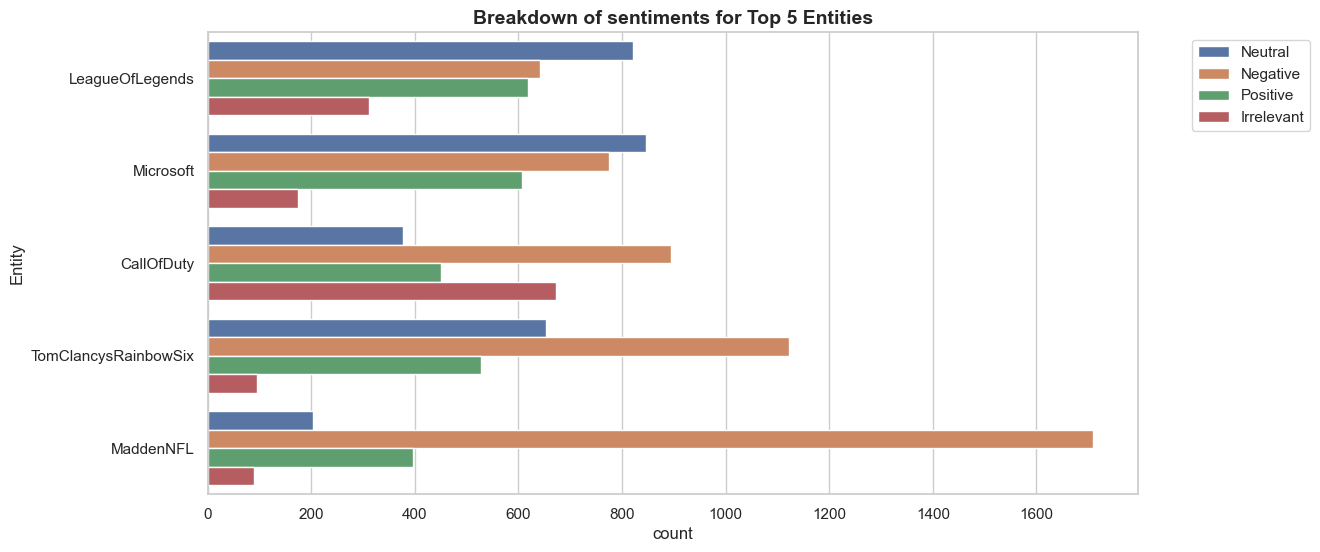

In [15]:
#Sentiment by Entity 
top_5_entities = df['Entity'].value_counts().head(5).index
df_top_5 = df[df['Entity'].isin(top_5_entities)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_5, y='Entity', hue='Sentiment')
plt.title('Breakdown of sentiments for Top 5 Entities',fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('twitter_images/Breakdown of sentiments for Top 5 Entities.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Data Preprocessing



In this stage, raw tweet text  is converted into a format suitable for machine learning. 
This involves:

Lowercasing: To ensure the model treats "Happy" and "happy" as the same word.

Noise Removal: Removing special characters and numbers that do not contribute to sentiment.

Stop Word Removal: Eliminating common words (e.g., "the", "is") that appear frequently but carry little sentimental value.

Stemming: Reducing words to their root form (e.g., "running" to "run") to consolidate the vocabulary.

In [16]:
# Since the number of missing values is barely 1.0%
# Drop the rows of missing values
df.dropna(subset=["Tweet_content"], inplace=True)

In [17]:
duplicates = df.duplicated().sum()
print(f"\nDuplicates removed: {duplicates}")
df.drop_duplicates(inplace=True)


Duplicates removed: 2340


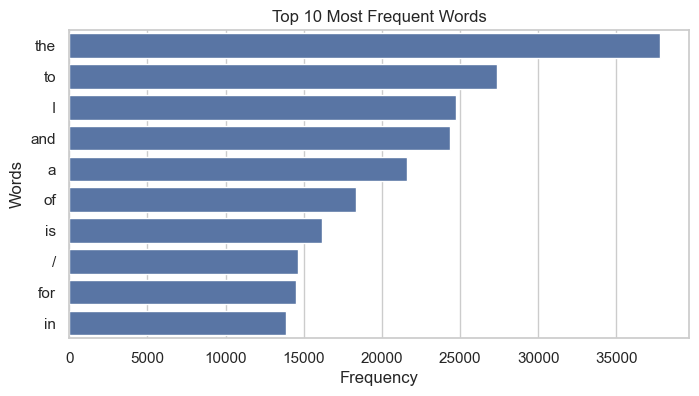

In [18]:
## Plot of the most frquent word
from collections import Counter

all_words = ' '.join(df['Tweet_content'])
word_freq = Counter(all_words.split()).most_common(10)

words = [word for word, freq in word_freq]
freqs = [freq for word, freq in word_freq]

plt.figure(figsize=(8,4))
sns.barplot(x=freqs, y=words)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('twitter_images/Top 10 Most Frequent Words.png', dpi=300, bbox_inches='tight')
plt.show()


In [61]:
# Encode the categories in the sentiment column in preparation for Machine learning modeling
le = LabelEncoder()
df["Sentiment"] = le.fit_transform(df["Sentiment"])


In [20]:
# Classes by the assigned number
for index, label in enumerate(le.classes_):
    print(f"{index} signifies: {label}")

0 signifies: Irrelevant
1 signifies: Negative
2 signifies: Neutral
3 signifies: Positive


In [21]:
#Stemming: reducing words to it's root word
port_stem = PorterStemmer()

 
def stemming(Tweet_content):
    #  Remove non-alphabetical characters from the "Tweet_content" column
    stemmed_content = re.sub("[^a-zA-Z]", " ", Tweet_content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content= " ".join(stemmed_content)
    return stemmed_content


df['stemmed_content'] = df['Tweet_content'].apply(stemming)


In [22]:
print(df["stemmed_content"])

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: stemmed_content, Length: 71656, dtype: object


# 8. Model Building

In [ ]:
# Split data to test and train set
X = df["stemmed_content"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
# shape of the training and test data
print(X.shape, y.shape, X_test.shape, X_train.shape)

(71656,) (71656,) (14332,) (57324,)


### Implementation of Machine Learning Pipeline
I utilize a Scikit-Learn Pipeline to encapsulate the entire workflow—from vectorization to classification—into a single object.

This is done to:
Prevents Data Leakage: It ensures that the TF-IDF vectorizer only "learns" the vocabulary from the training set, preventing information from the test set from "leaking" into the model.

Reproducibility: It simplifies the process of applying the transformation to new data during deployment.

In [59]:
# Pipeline 
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Fit
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# 9. Model Evaluation

In [60]:
# Empty list to impute metrics from the model evaluation
results_data = []

y_pred = model.predict(X_test)
            
#Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [57]:
# Append metrics to result empty list
results_data.append({'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-Score': f1})


Accuracy:  0.6865754953949205
Precision: 0.6897684076674891
Recall:    0.6865754953949205
F1-Score:  0.6871048963023862

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2507
           1       0.76      0.73      0.74      4340
           2       0.68      0.62      0.65      3542
           3       0.68      0.71      0.69      3943

    accuracy                           0.69     14332
   macro avg       0.68      0.68      0.68     14332
weighted avg       0.69      0.69      0.69     14332

Confusion Matrix:   [[1714  238  241  314]
 [ 355 3150  369  466]
 [ 399  424 2192  527]
 [ 405  340  414 2784]] 


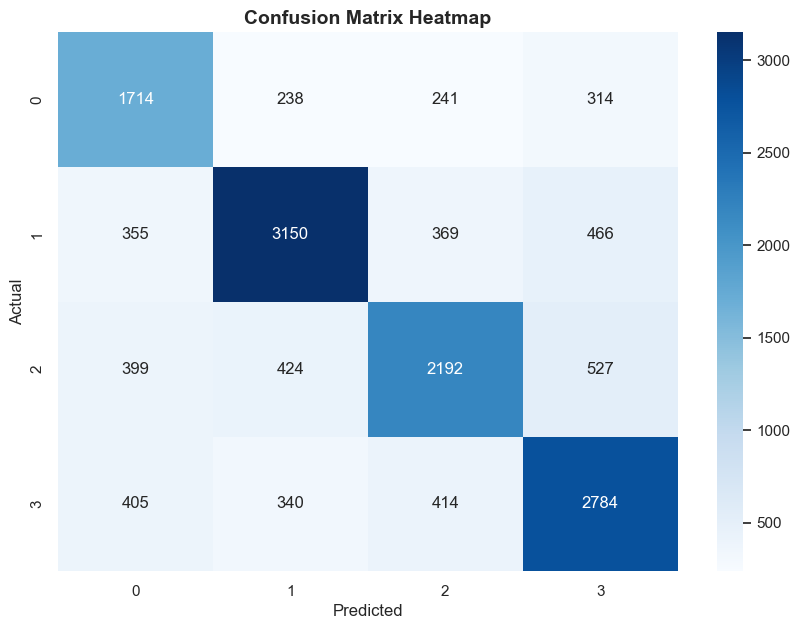

In [62]:
# Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(f"\nAccuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1-Score:  {f1}")   
     
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))
print(f"Confusion Matrix:   {confusionMatrix} ")

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap', fontsize=14, fontweight='bold')
plt.savefig('twitter_images/Confusion Matrix Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


##  Hyperparameter Tuning
This is implemented to move beyond a baseline model, GridSearchCV is used to systematically test different combinations of settings. We are specifically tuning:

ngram_range: Comparing whether the model performs better looking at single words (unigrams), pairs (bigrams) or three words(trigrams)

C (Regularization): Finding the balance between "memorizing" the training data (overfitting) and generalizing to new tweets.

max_features: Determining the optimal size of our vocabulary for the best performance.

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])

param_grid = {
    'tfidf__max_features': [3000, 5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 3)],
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)


print("Starting Hyperparameter Tuning")
grid_search.fit(X_train, y_train)

# results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Best version of the model for final predictions
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

Starting Hyperparameter Tuning
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'clf__C': 10, 'clf__solver': 'lbfgs', 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 3)}
Best Cross-Validation Score: 0.755024073686414


In [34]:
baseline_accuracy = 0.6866 
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Tuned Accuracy:    {tuned_accuracy}")
print(f"Improvement:       {((tuned_accuracy - baseline_accuracy) / baseline_accuracy) * 100}%")


Baseline Accuracy: 0.6866
Tuned Accuracy:    0.7787468601730394
Improvement:       13.420748641572883%


Tuned Model Performance
Accuracy:  0.7787468601730394
Precision: 0.7808952815661249
Recall:    0.7787468601730394
F1-Score:  0.7792808989643792

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2507
           1       0.84      0.80      0.82      4340
           2       0.78      0.75      0.76      3542
           3       0.76      0.78      0.77      3943

    accuracy                           0.78     14332
   macro avg       0.77      0.78      0.77     14332
weighted avg       0.78      0.78      0.78     14332



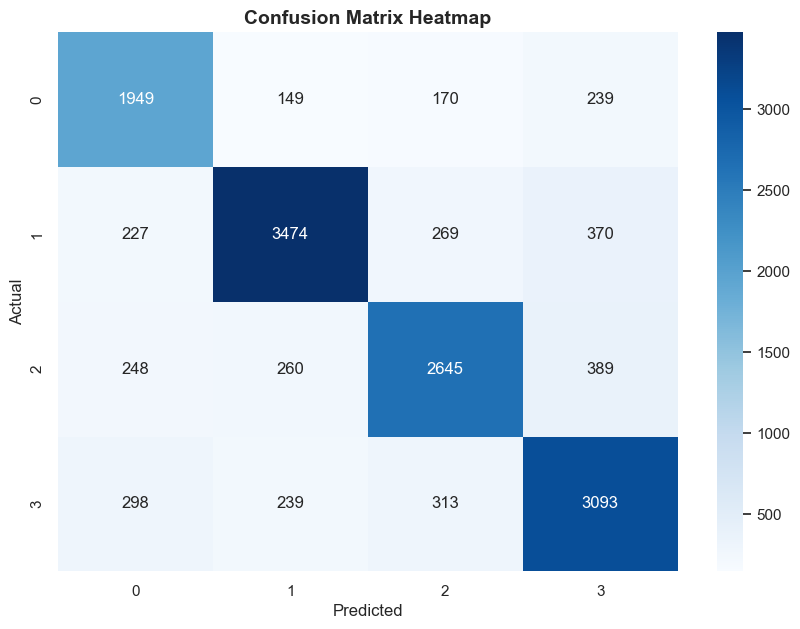

In [64]:
# Metrics using the tuned predictions
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned, average='weighted')
recall = recall_score(y_test, y_pred_tuned, average='weighted')
f1 = f1_score(y_test, y_pred_tuned, average='weighted')

# 2. Print the formatted results
print("Tuned Model Performance")
print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1-Score:  {f1}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_tuned))

# Plot
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap', fontsize=14, fontweight='bold')
plt.savefig('twitter_images/Confusion Matrix: Optimized Model.png', dpi=300, bbox_inches='tight')
plt.show()


# Performance Analysis & Interpretation
#### Model Performance:  
Baseline: The initial Logistic Regression model achieved an accuracy of 68.66%.

Optimized: 
After hyperparameter tuning using GridSearchCV (finding the best settings for C, solver, and (ngram_range), the accuracy improved to 77.87%, a 13.42% increase in performance.

Weighted F1-Score: 
Reaching 0.779, this indicates a strong balance between precision and recall across all four classes.

#### Key Insights:
Negative Sentiment Strength: The model is most effective at identifying "Negative" sentiment (Precision: 0.84), suggesting that negative language on Twitter is distinct and highly recognizable by the TF-IDF vectorizer.

Complexity of Irrelevant Content: The "Irrelevant" class was the most challenging for the model (Precision: 0.72), likely due to the highly varied nature of non-topical tweets.

Impact of N-Grams: Moving to a (1, 3) ngram range during tuning allowed the model to capture context beyond single words (unigrams), which was critical for boosting accuracy.


# 10. Conclusion and Recommendations
## Conclusion: 
The project demonstrates that a standardized Data Science Life Cycle including text cleaning, stemming, and pipelining can turn noisy social media data into actionable insights. While Logistic Regression provided a robust baseline, the 13.4% improvement through tuning proves that optimization is essential for deployment-ready models.

## Recommendations:

* The current Logistic Regression model provides a strong baseline, it treats words as independent units (Bag-of-Words). To achieve accuracy >77%, the next step is implementing Transformer-based models like BERT (Bidirectional Encoder Representations from Transformers)

* Handle Data Imbalance: Use resampling techniques (like SMOTE) or collect more "Irrelevant" and "Neutral" samples to make the model more robust against non-polarized text.

* Real-Time Integration: Deploy the pipeline using a framework like Streamlit or Flask to create a live dashboard that pulls real-time Twitter data for continuous monitoring.

* Advanced Vectorization: Experiment with Word2Vec or GloVe embeddings instead of TF-IDF to capture the relationship between similar words (e.g., "awful" and "terrible").